In [1]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, data.table, foreach, sqldf, tidyr, stringr, dplyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Experiments/Logs/"
SAVE_PDF = F
W = 6
H = 6

data = read.csv(paste0(RESEARCH_HOME, PATH, 'output.csv'), header = F, sep = ";")

names(data) = c("runID", "Date", "Method", "Cores", "Epsilon", "Mu", "Delta", "methodTime"
               , "n", "timestamp", "Stage", "stageTime", "Load", "Unit")
data$Cores      = as.numeric(as.character(data$Cores))
data$Epsilon    = as.numeric(as.character(data$Epsilon))
data$Mu         = as.numeric(as.character(data$Mu))
data$Delta      = as.numeric(as.character(data$Delta))
data$methodTime = as.numeric(as.character(data$methodTime))
data$stageTime  = as.numeric(as.character(data$stageTime))

muDefault      = 4
deltaDefault   = 5
epsilonDefault = 10
coresDefault   = 28

data

Loading required package: pacman


runID,Date,Method,Cores,Epsilon,Mu,Delta,methodTime,n,timestamp,Stage,stageTime,Load,Unit
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,57,"2018-05-12 09:13:01,801",1.Getting disks,161.63,30,disks
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,58,"2018-05-12 09:13:05,945",2.Joining timestams,4.14,10,candidates
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,77,"2018-05-12 09:13:22,486",3.Distance Join phase...,3.87,13,combinations
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,78,"2018-05-12 09:13:24,676",4.Getting candidates...,2.19,10,candidates
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,98,"2018-05-12 09:13:42,017",3.Distance Join phase...,4.06,15,combinations
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,99,"2018-05-12 09:13:44,276",4.Getting candidates...,2.26,10,candidates
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,119,"2018-05-12 09:14:00,637",3.Distance Join phase...,4.28,18,combinations
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,120,"2018-05-12 09:14:03,010",4.Getting candidates...,2.37,10,candidates
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,122,"2018-05-12 09:14:03,970",5.Checking internal timestamps,3.33,10,flocks
0,"2018-05-12 09:34:11,137",MergeLast,28,10,4,5,1431.151,153,"2018-05-12 09:16:44,108",1.Getting disks,159.80,27,disks


In [2]:
dataDelta = data[data$Cores == coresDefault & data$Mu == muDefault & data$Method == "MergeLast" 
                 , c("Epsilon", "Stage", "stageTime", "Delta")]

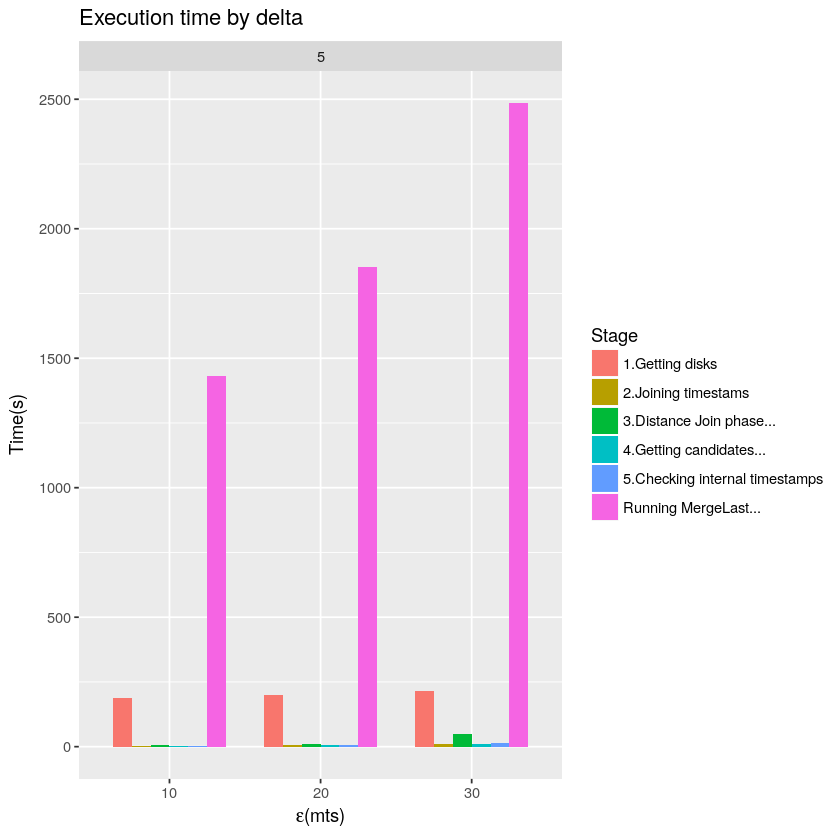

In [3]:
title = "Execution time by delta"
g = ggplot(data=dataDelta, aes(x=factor(Epsilon), y=stageTime, fill=Stage)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) +
  facet_wrap(~Delta)
if(SAVE_PDF){
  ggsave("./MergeLastStagebyDelta.pdf", g)
} else {
  plot(g)
}